# Titanic - Machine Learning from Disaster

## Predict survival on the Titanic and get familiar with ML basics

https://www.kaggle.com/c/titanic/data

![image.png](../../Images/Titanic.png)

#### 탐색적 데이터 분석 (EDA ; Exploratory Data Analysis) 

- 주어진 각 feature들의 분포 살펴보기, 생존자/사망자 별로 데이터 분리하여 살펴본다.
- 어떤 정보를 통해 **생존율을 예측**할 수 있을 지, 가설을 세우고 실제 그래프로 검증한다.

#### [ 데이터 설명 ]

- 891명의 승객에 대한 데이터 : 생존여부 / 좌석 등급 / 성별 / 나이 / 일행 / 자녀 / 운임 등의 feature

|Feature|Definition|Value|
|:------|:---------|:------------|
|survived|생존 여부|0 = No, 1 = Yes|
|pclass|티겟 등급 (1등석, 2등석, 3등석)|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|성별| male 남성,  female 여성
|age|나이  |((숫자))
|sibsp|함께 탑승한 배우자, 형제자매의 수 합|   ((숫자))
|parch|함께 탑승한 부모님, 자녀의 수 합|   ((숫자))
|fare|운임 요금 (티켓 가격)|   ((숫자))
|embarked|출항지 (한글자)|C = Cherbourg, Q = Queenstown, S = Southampton|
|class|티켓 등급 (단어로)|  First, Second, Third
|who|남성/여성/아이 구분|    man, woman, child
|adult_male|성인 남성인지의 여부|    True, False
|deck|선박에서 배정받은 좌석의 구역|    A, B, C, D, E, F, G, 빈 값
|embark_town|출항지 (풀네임)|   ((도시이름))
|alive|생존 여부|    yes, no
|alone|혼자인지 여부|    True, False

### Library & Data Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set() # 특징 초기화

# plt.rcParams['font.family'] = 'NanumGothic' # 윈도우(Windwos) 사용자
plt.rcParams['font.family'] = 'AppleGothic' # 맥(Mac) 사용자

In [11]:
titanic_df = pd.read_csv('../../Datasets/Titanic.csv')

In [12]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### EDA ( Exploratory Data Analysis )

In [13]:
# .info() 함수로 데이터 컬럼별 타입(자료형), 값이 있는 행(Non-Null)의 갯수 등을 알 수 있다.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [14]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 범주형 컬럼과, 수치형 컬럼으로 나누어서 리스트를 만든다.  (추후 분석 시 반복되는 코드를 줄일 수 있다)

- 범주형 데이터은 값이 [1, 2, 3], ["내부", "외부"]와 같이 몇 가지 분류로 한정되는 데이터 이다.
- 수치형 데이터는 값이 1,2,3,5,..., 1.2, 4.51, 3.1415와 같이 숫자 축으로 무한히 위치할 수 있는 데이터 이다.

In [16]:
category_cols = ["sex","embarked","class","who","adult_male","deck","embark_town","alive","alone"]

In [19]:
print(category_cols)

['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [21]:
numerical_cols = ["age","sibsp","parch","fare"]

In [22]:
print(numerical_cols)

['age', 'sibsp', 'parch', 'fare']


### Exploratory Data for Statistic

In [11]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# .value_counts()를 통해 각 컬럼별로 몇 개의 row가 있는지 셀 수 있습니다
for col in category_cols:
    print(col + " 카운트::")
    print(titanic_df.loc[:, col].value_counts())
    print()

sex 카운트::
male      577
female    314
Name: sex, dtype: int64

embarked 카운트::
S    644
C    168
Q     77
Name: embarked, dtype: int64

class 카운트::
Third     491
First     216
Second    184
Name: class, dtype: int64

who 카운트::
man      537
woman    271
child     83
Name: who, dtype: int64

adult_male 카운트::
True     537
False    354
Name: adult_male, dtype: int64

deck 카운트::
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

embark_town 카운트::
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

alive 카운트::
no     549
yes    342
Name: alive, dtype: int64

alone 카운트::
True     537
False    354
Name: alone, dtype: int64



### Data Visiualization

수치형 컬럼들의 분포를 그려본다. 통계량은 boxplot으로 살펴보고, 분포는 histplot으로 그린다.

- 이 코드에서는 반복문을 이용하여 여러개의 차트를 그린다.
- plt.subplots를 통해 여러 개의 도화지를 생성한다. (nrows × ncols)
- for문 안에서는 각 도화지(ax)에 seaborn으로 차트를 그린다.

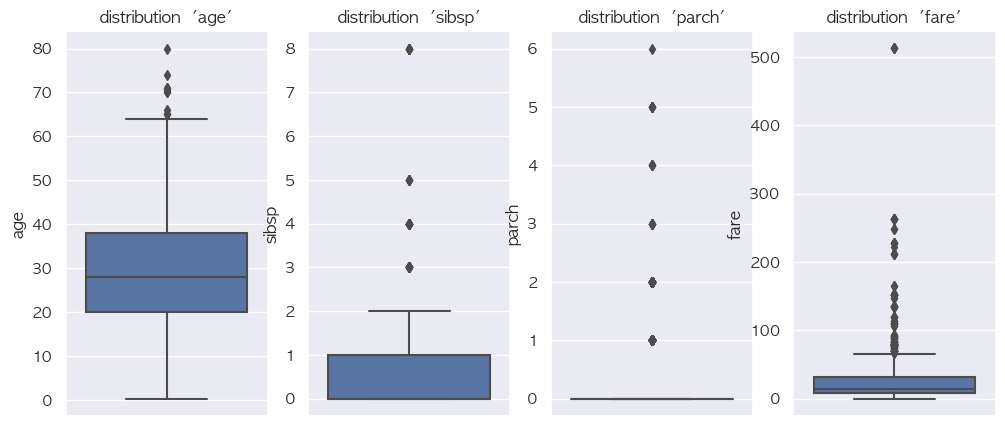

In [13]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(12,5)

for i in range(4):
    col = numerical_cols[i]
    sns.boxplot(data=titanic_df, y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{col}'")

범주형 컬럼들의 분포를 그려본다. 범주형이므로 countplot을 통해 각 범주별로 개수를 셀 수 있다.

- 범주형 컬럼이 총 9개 이므로, 3x3 도화지 레이아웃으로 하나씩 그래프를 그려본다.
- ax_list_list는 [[ ], [ ]] 형태의 2차원 리스트 이다. for 문으로 반복하기 위해 1차원 리스트로 풀어준다.
- 1차원 리스트 ax_list가 9개의 도화지 (ax)를 갖도록 풀어서 할당하는데, `.reshape()` 라는 numpy 함수를 사용한다.

(3, 3)
(9,)


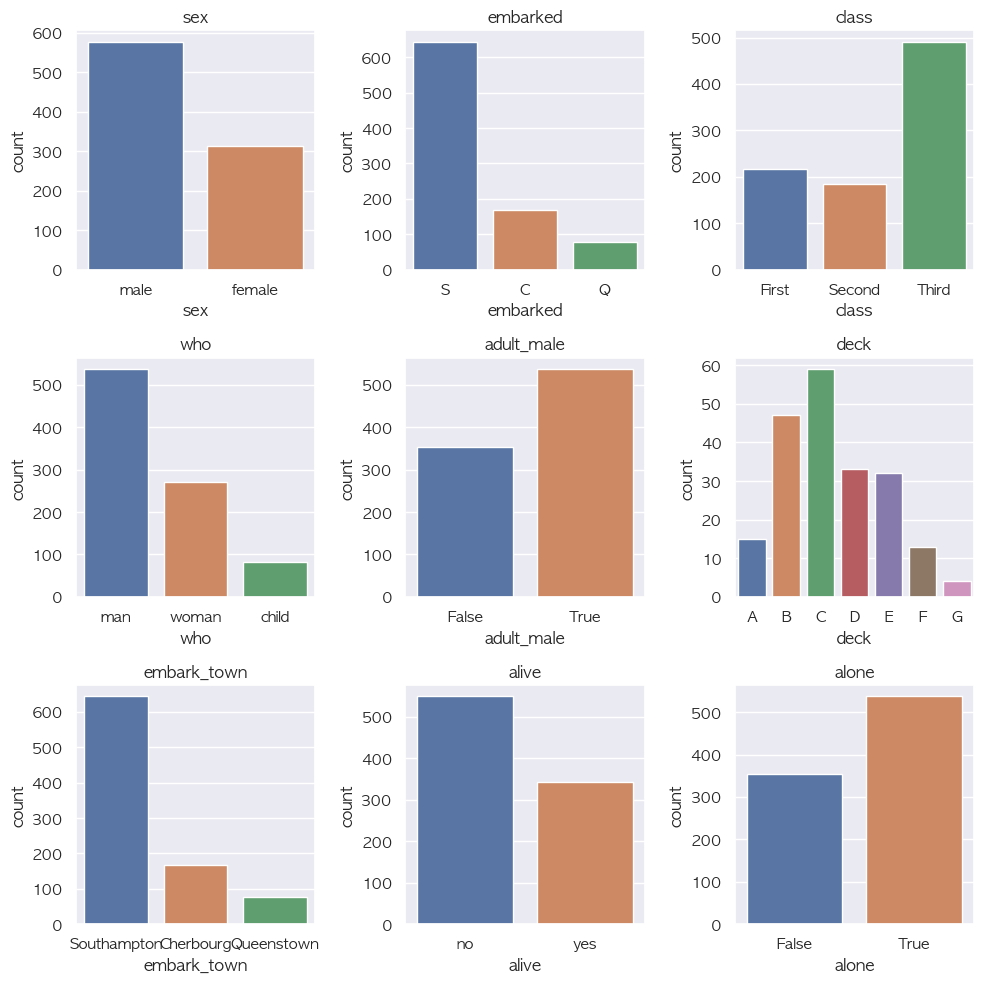

In [15]:
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)

ax_list = ax_list_list.reshape(9)  # 다차원 행렬의 차원을 원하는 모양으로 변경한다.
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()

### Data Validation

여기서부터는 EDA의 범위를 넘어선다. 탑승객의 '생존'에 어떤 것들이 영향을 미치는지 알아본다.

몇 가지 가설을 세우고 그래프를 그려 '생존'에 영향을 미치는 요인이 무엇인지 살펴본다.

#### 성별과 생존 여부

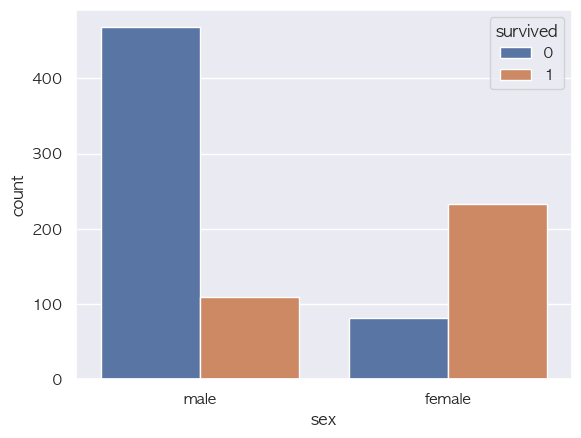

In [17]:
sns.countplot(data=titanic_df, x='sex', hue='survived');

#### 좌석 등급과 생존 여부

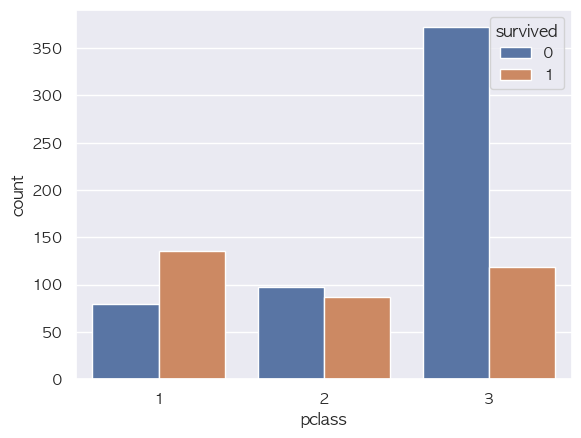

In [18]:
sns.countplot(data=titanic_df, x='pclass', hue='survived');

#### 9개의 범주형 분류에 대해, 생존 여부로 그래프 그리기

(3, 3)
(9,)


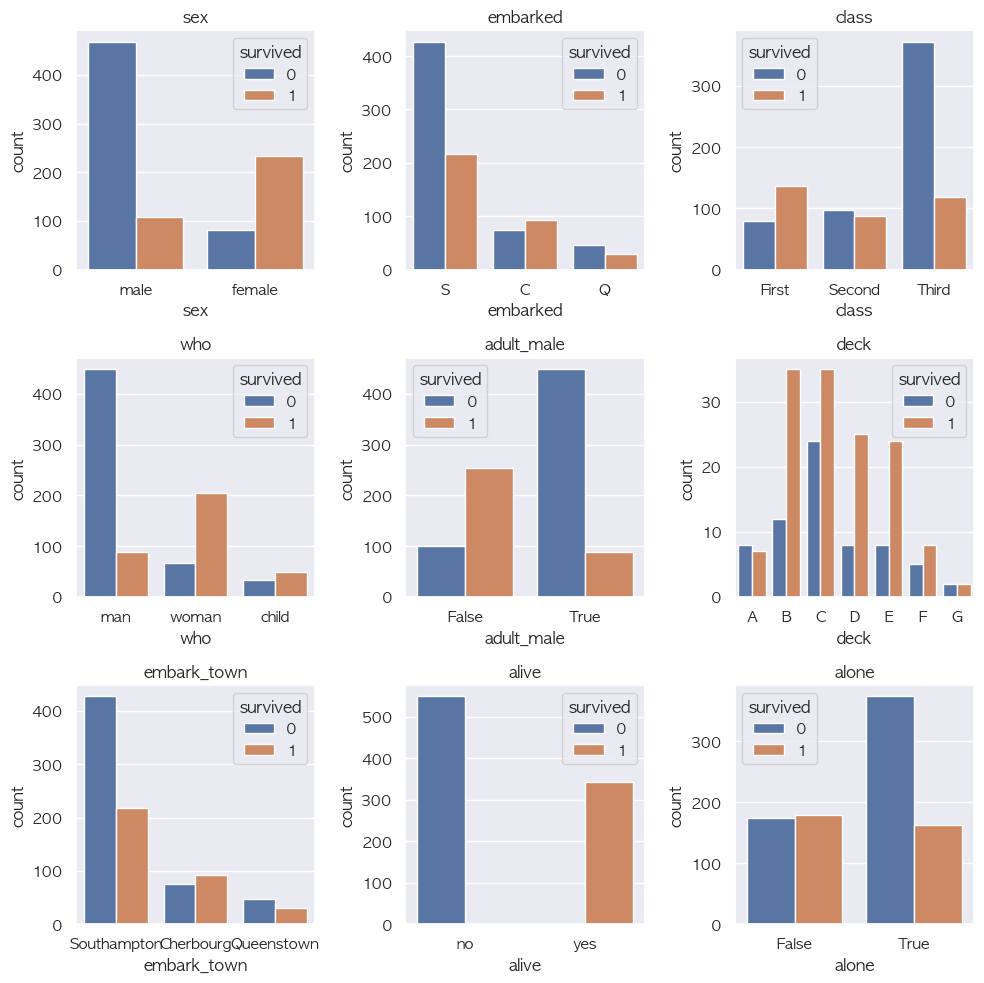

In [19]:
# hue 인자로 'survived' 컬럼을 입력, 각 분류형 데이터 별로 생존/사망 분리하여 살펴본다.

figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)

ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list[i], hue='survived')
    ax_list[i].set_title(col)

plt.tight_layout()

- 남성보다 여성의 생존률이 더 높습니다 (남성 > 여성 > 아이)
- 탑승지(embarked)가 C인 경우 생존율이 높습니다
- 1등석 > 2등석 > 3등석 순으로 생존율이 높습니다
- B,D,E 덱 위치의 승객들이 생존율이 높습니다
- 나홀로 승객은 생존율이 낮습니다

#### 성별과 좌석 등급에 따라, 나이의 boxplot 그려보기

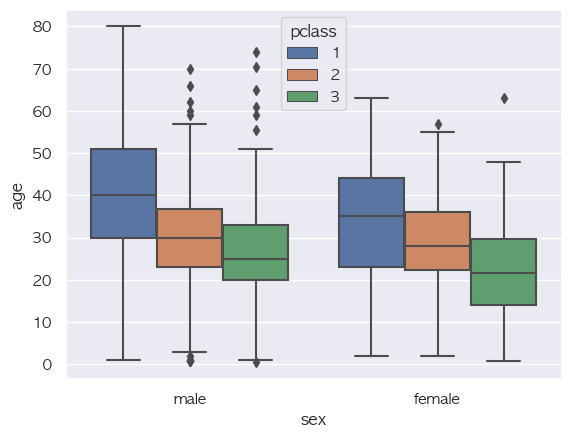

In [21]:
sns.boxplot(data=titanic_df, x='sex', y='age', hue='pclass');

#### 배우자+형제자매의 수, 생존 여부 별 나이의 boxplot

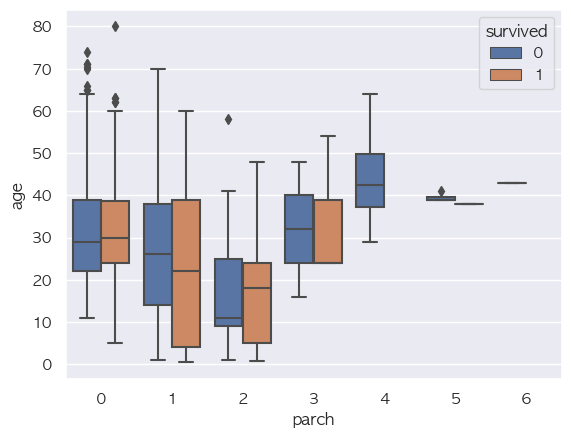

In [22]:
sns.boxplot(data=titanic_df, x="parch", y="age", hue='survived');

## Insight